<a href="https://colab.research.google.com/github/mehedi-4/neural-net-practice/blob/main/tf_keras_seq_fuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

##Sequential API

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=(28 * 28,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation='softmax'),
    ]
)

# model =  keras.Sequential()
# model.add(keras.Input(shape=(28*28,)))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [7]:
model.fit(x_train, y_train, epochs=4, batch_size=32)
model.evaluate(x_test, y_test)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9041 - loss: 0.3185
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9758 - loss: 0.0768
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0502
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0373
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9683 - loss: 0.1129


[0.09137214720249176, 0.9745000004768372]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


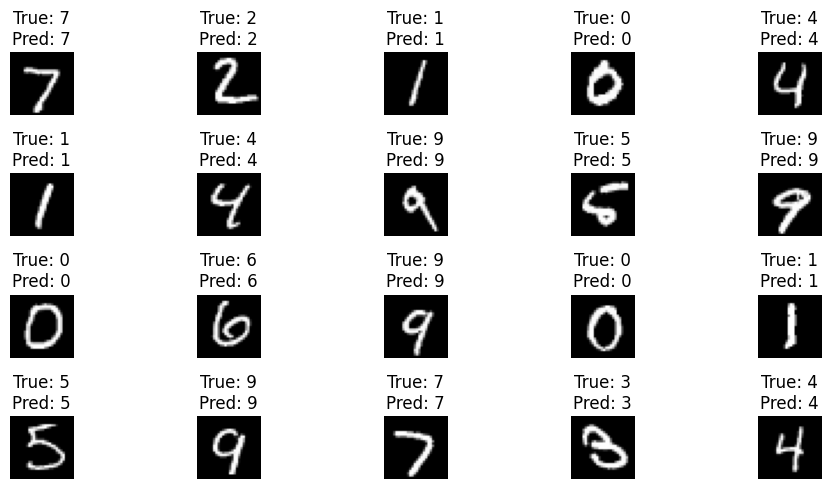

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions with the current model
predictions_proba = model.predict(x_test)
predicted_classes = np.argmax(predictions_proba, axis=1)

plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Functional API

In [12]:
inputs = layers.Input(shape=(28*28,))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [14]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3348 - loss: 2.0377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7469 - loss: 1.0662
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8138 - loss: 0.6991
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8386 - loss: 0.5741
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8557 - loss: 0.5054
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8654 - loss: 0.4714
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.4411
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8812 - loss: 0.4111
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8833 - loss: 0.3993
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.3788


In [15]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9005 - loss: 0.3472


[0.29911378026008606, 0.9143000245094299]

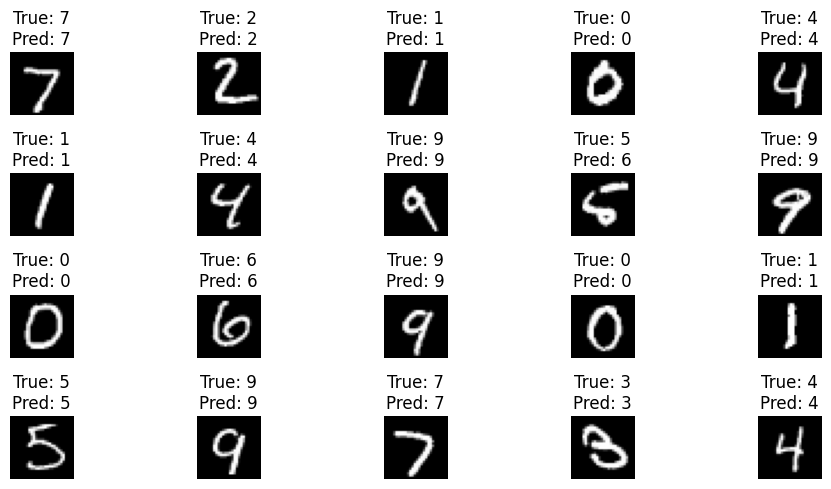

In [18]:
import matplotlib.pyplot as plt
import numpy as np

predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()